# Caracterización de textura mediante LBP

## Autor: Ronie Martínez

#### Trabajo presentado como actividad propuesta para la asignatura "Percepción Computacional"

## Importaciones de librerías
Importamos las librerías que vamos a ocupar, para este laboratorio, la más nueva, y por ende la que mayor interés tendrá para la práctica es la función **local_binary_pattern** dentro de la librería **skimage.feature**

In [40]:
#Importamoslibrerias
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from sklearn.metrics import mean_squared_error as mse

## Establecemos las constantes de Local Binary Pattern
Aplicamos los LBP para obtener características de las imágenes, específicamente de las texturas presentes en ellas. Para esto lo realizamos con un Radio de 3, 8 píxeles vecinos y un método uniforme, el cual mejora la invarianza rotacional

In [41]:
#Constantes
radius = 3
n_points = 8*radius #p=24 #última es no-uniforme
METHOD = 'uniform'

## Se crea una clase llamada "laboratorio2"
Esta clase encapsula las diferentes operaciones que se irán realizando.

In [42]:
class laboratorio2:
    def __init__(self,image1,image2,image3):
        self.img1 = io.imread(image1, as_gray=True)
        self.img2 = io.imread(image2, as_gray=True)
        self.img3 = io.imread(image3, as_gray=True)
    
    def plotimage(self):
        fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(16, 8))
        ax[0].imshow(self.img1, cmap=plt.cm.gray)
        ax[0].set_title('Textura 1')
        ax[1].imshow(self.img2, cmap=plt.cm.gray)
        ax[1].set_title('Textura 2')
        ax[2].imshow(self.img3, cmap=plt.cm.gray)
        ax[2].set_title('Textura 3')
        plt.show()
    
    def plothist(self,lbp1,lbp2,lbp3):
        fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(16, 4))
        ax[0].hist(lbp1.ravel(), bins=n_points+2)
        ax[0].set_title('Histograma Textura 1')
        ax[1].hist(lbp2.ravel(), bins=n_points+2)
        ax[1].set_title('Histograma Textura 2')
        ax[2].hist(lbp3.ravel(), bins=n_points+2)
        ax[2].set_title('Histograma Textura 3')
        plt.show()
    
    def plotimagehist(self,image,image_rot,lbp,lbp_rot):
        fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))
        ax[0][0].imshow(image, cmap=plt.cm.gray)
        ax[0][0].set_title('Original Texture1')
        ax[0][1].imshow(image_rot, cmap=plt.cm.gray)
        ax[0][1].set_title('Texture1 rot 90°')
        ax[1][0].hist(lbp.ravel(), bins=n_points+2)
        ax[1][0].set_title('Histogram Original Texture1')
        ax[1][1].hist(lbp_rot.ravel(), bins=n_points+2)
        ax[1][1].set_title('Histogram Texture1 rot 90°')
        plt.tight_layout()
        plt.show()

Declaramos la clase "laboratorio2" y como argumentos van las imagenes alojadas en el directorio actual, luego mostramos las 3 imagenes.

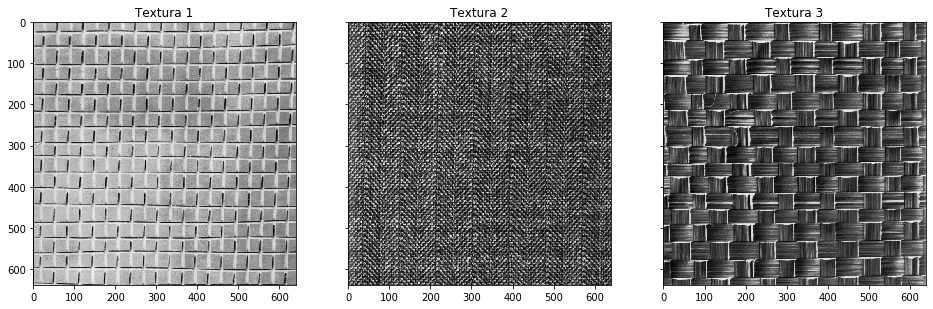

In [49]:
x = laboratorio2('texture1.gif','texture2.gif','texture3.gif')
x.plotimage()

Aplicamos los LBP para obtener características de las imágenes, específicamente de las texturas presentes en ellas, para ello utilizamos las constantes definidas más arriba.

In [50]:
lbp1 = local_binary_pattern(x.img1, n_points, radius, METHOD)
lbp2 = local_binary_pattern(x.img2, n_points, radius, METHOD)
lbp3 = local_binary_pattern(x.img3, n_points, radius, METHOD)

## Visualización de los Histogramas
Podemos observar los histogramas que se obtuvieron de las texturas de las imágenes. A pesar de que son similares entre los 3, hay 2 que son mucho más parecidos entre ellos. Se tratan del primer y tercer histograma. Esta semejanza se da debido a que los patrones de ambas texturas son similares en tamaño y forma.

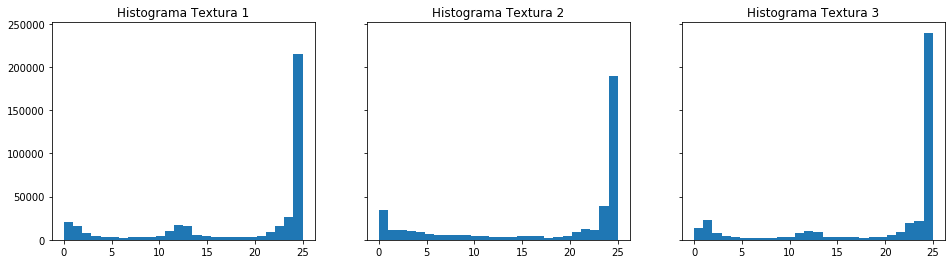

In [44]:
x.plothist(lbp1,lbp2,lbp3)

## Comprobación ante rotaciones
Para comprobar la teoría, rotamos las matrices de datos que forman las imágenes y volvemos a ejecutar los LBPs sobre la imagen rotada.
Teóricamente deben ser idénticos, sin embargo, en la práctica podemos ver que no ocurre así; podemos observar que existen pequeñas variaciones, casi imperceptibles entre los dos histogramas.
Esto es debido a los patrones circulares que se utilizan para esta transformación y como algunos de los puntos que se toman no cuadran exactamente con un pixel vecino.

Rotacion de primera textura y resultados en histograma

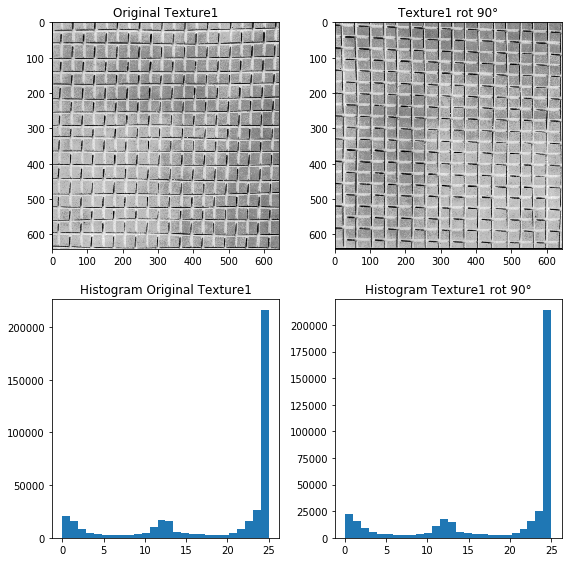

In [45]:
imagen1_rot = rotate(x.img1, angle=90)
lbp1_rot = local_binary_pattern(imagen1_rot, n_points, radius, METHOD)
x.plotimagehist(x.img1,imagen1_rot,lbp1,lbp1_rot)

Rotacion de segunda textura y resultados en histograma

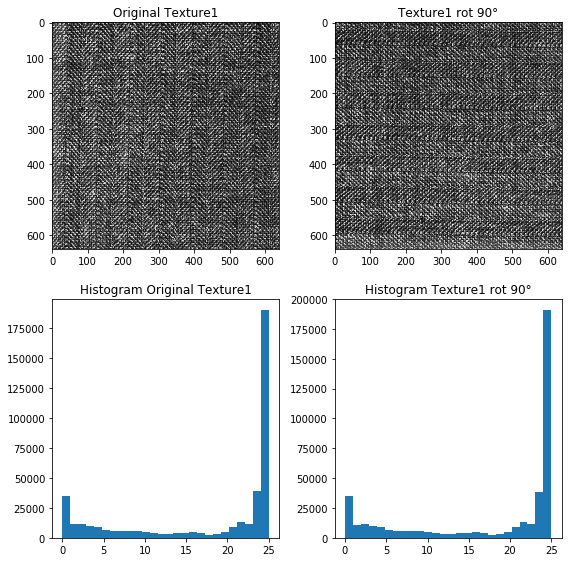

In [46]:
imagen2_rot = rotate(x.img2, angle=90)
lbp2_rot = local_binary_pattern(imagen2_rot, n_points, radius, METHOD)
x.plotimagehist(x.img2,imagen2_rot,lbp2,lbp2_rot)

Rotacion de tercera textura y resultados en histograma

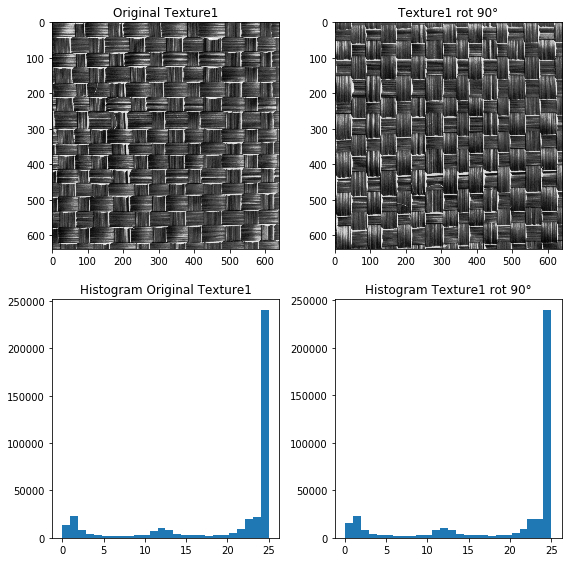

In [47]:
imagen3_rot = rotate(x.img3, angle=90)
lbp3_rot = local_binary_pattern(imagen3_rot, n_points, radius, METHOD)
x.plotimagehist(x.img3,imagen3_rot,lbp3,lbp3_rot)

Se obtienen las cantidades medias finales y el error cuadratico medio, de las mismas.

In [48]:
#Texture 3
counts_lbp3, bins_lbp3 = np.histogram(lbp3.ravel())
counts_lbp3rot, bins_lbp3rot = np.histogram(lbp3_rot.ravel())

print("Counts original: ", counts_lbp3)
print("Counts rotated:  ", counts_lbp3rot)
print("MSE: ", mse(counts_lbp3, counts_lbp3rot))

Counts original:  [ 44679   7147   5839   4795  20928  12341   9226   5239  17642 281764]
Counts rotated:   [ 46228   7432   6089   5000  21689  11929   8958   5063  17456 279756]
MSE:  750347.6


## Conclusiones
1. Podemos observar que el método de transformación por Patrones Binarios Locales nos permite realizar una comparación y diferenciación de las texturas basadas en la graficación de los histogramas resultantes de este método. A través de ellos podemos diferenciar de texturas muy diferentes, y también comparar y relacionar texturas similares como en nuestro caso, las texturas 1 y 3.
2. A pesar de que la teoría menciona que al rotar la matriz, esta no debería experimentar cambios, se evidencia que existen cambios pequeños que podría ser interesante tomarlos en cuenta en aplicaciones reales. Por ejemplo, considerar las pequeñas variaciones que pueden existir de una misma imagen si esta es rotada, y entrenar un sistema inteligente para reconocer todas las posibles variaciones de una misma textura según su rotación como una sola.
3. La técnica de LBP's es una técnica con gran aplicación ya en los campos reales, esta nos permite realizar una extracción de características para hacer el entrenamiento de un sistema inteligente más eficiente.